**Description**: Analyze accuracies for $m = 50, n = 100$.

**Estimated runtime**: `model.fit` was ran in the cloud instead. See
https://github.com/kddubey/pretrain-on-test/tree/main/cloud_scripts/gcp#run-the-analysis

In [1]:
import os
import sys
from typing import Literal

import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join('..', '..')))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 50
num_test: Literal[50, 100, 200, 500] = 100

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_from_paper")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + lm_type + (1|dataset/pair)"
id_vars = ["num_test", "pair", "lm_type", "dataset"]

# Plot

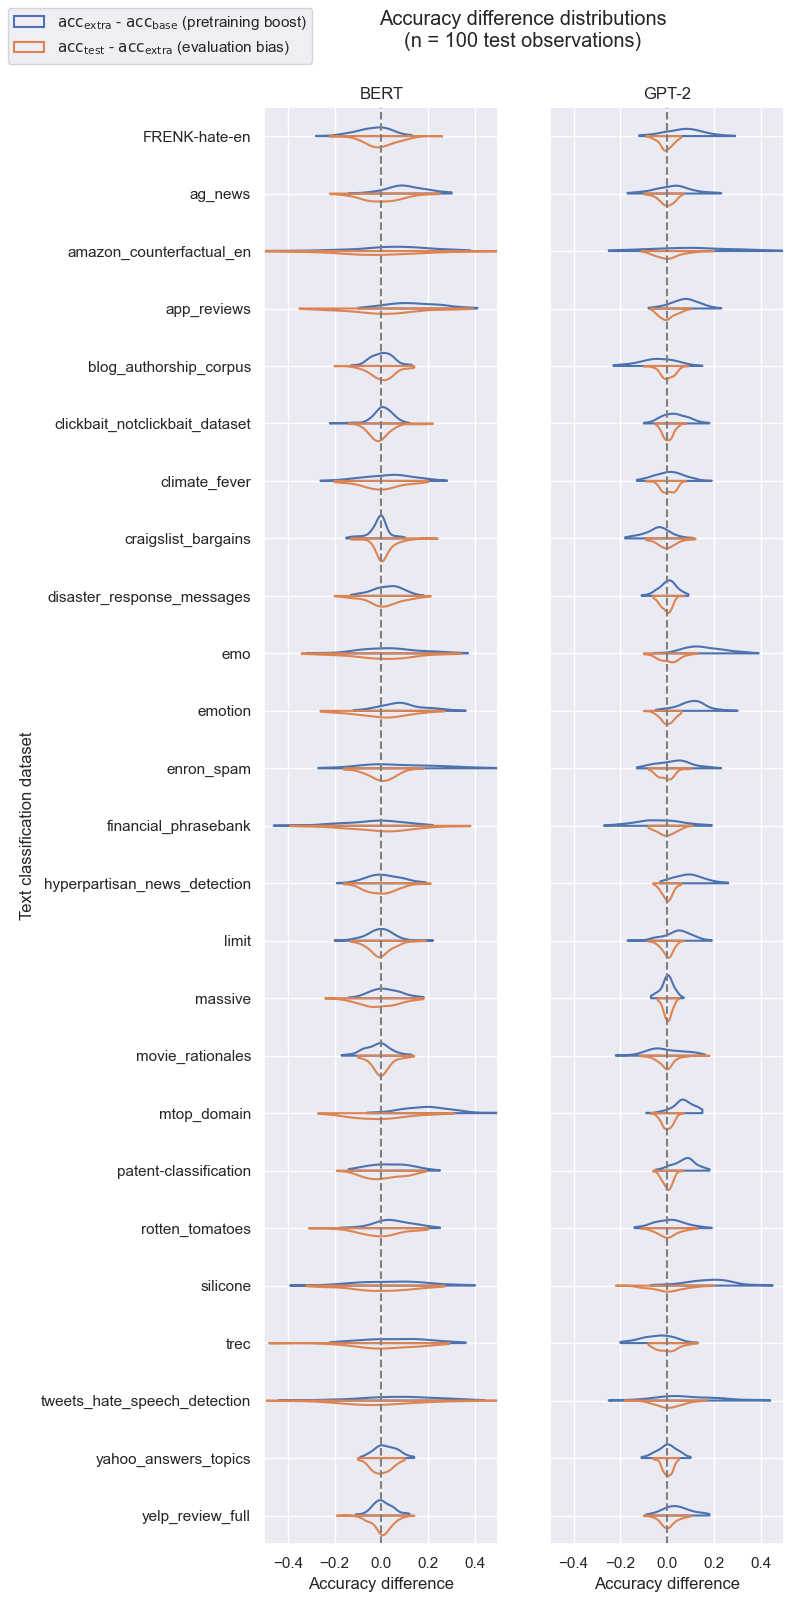

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test)

# Control

In [7]:
summary_control, summary_relative_control = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌────────┬──────────┐
│ mean   ┆ se       │
╞════════╪══════════╡
│ 0.0399 ┆ 0.009104 │
└────────┴──────────┘
Overall difference (relative):
┌──────┬─────┐
│ mean ┆ se  │
╞══════╪═════╡
│ inf  ┆ NaN │
└──────┴─────┘


In [8]:
summary_control

dataset,mean,se
"""FRENK-hate-en""",0.0192,0.009398
"""ag_news""",0.06595,0.009215
"""amazon_counter…",0.0735,0.017391
"""app_reviews""",0.10635,0.009516
"""blog_authorshi…",-0.01855,0.006758
…,…,…
"""silicone""",0.1114,0.014343
"""trec""",0.01075,0.012093
"""tweets_hate_sp…",0.07545,0.01576
"""yahoo_answers_…",0.0105,0.004683


In [9]:
summary_relative_control

dataset,mean,se
"""FRENK-hate-en""",0.056927,0.019093
"""ag_news""",0.149912,0.024014
"""amazon_counter…",0.18816,0.041815
"""app_reviews""",0.893009,0.09439
"""blog_authorshi…",-0.027435,0.012638
…,…,…
"""silicone""",0.367048,0.045772
"""trec""",0.108914,0.056162
"""tweets_hate_sp…",0.177858,0.033781
"""yahoo_answers_…",0.215067,0.056409


Ran this in the cloud instead. See
https://github.com/kddubey/pretrain-on-test/tree/main/cloud_scripts/gcp#run-the-analysis

In [10]:
# model_control, summary_control, az_summary_control = utils.stat_model(
#     num_correct_df,
#     treatment="extra",
#     control="base",
#     equation=equation,
#     id_vars=id_vars,
# )

In [11]:
# print(model_control)

# Treatment

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.001436 ┆ 0.000683 │
└──────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.048137 ┆ 0.012764 │
└──────────┴──────────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",-0.00305,0.005455
"""ag_news""",0.0004,0.006681
"""amazon_counter…",0.0011,0.01585
"""app_reviews""",0.00705,0.010805
"""blog_authorshi…",0.0036,0.004644
…,…,…
"""silicone""",0.00035,0.010675
"""trec""",0.00745,0.010654
"""tweets_hate_sp…",-0.0033,0.014396
"""yahoo_answers_…",0.00105,0.003399


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",-0.000416,0.010109
"""ag_news""",0.005658,0.011545
"""amazon_counter…",0.048106,0.037444
"""app_reviews""",0.111276,0.053674
"""blog_authorshi…",0.01247,0.009331
…,…,…
"""silicone""",0.03894,0.027555
"""trec""",0.114468,0.048458
"""tweets_hate_sp…",0.029323,0.031712
"""yahoo_answers_…",0.072246,0.034903


Ran this in the cloud instead. See
https://github.com/kddubey/pretrain-on-test/tree/main/cloud_scripts/gcp#run-the-analysis

In [15]:
# model_bias, summary_bias, az_summary_bias = utils.stat_model(
#     num_correct_df,
#     treatment="test",
#     control="extra",
#     equation=equation,
#     id_vars=id_vars,
# )

In [16]:
# print(model_bias)

# Write inference data

Ran this in the cloud instead. See
https://github.com/kddubey/pretrain-on-test/tree/main/cloud_scripts/gcp#run-the-analysis

In [17]:
# netcdfs = os.path.join("..", "..", "netcdfs", f"m{num_train}")
# if not os.path.exists(netcdfs):
#     os.mkdir(netcdfs)

In [18]:
# summary_control.to_netcdf(
#     filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_control.nc")
# )

In [19]:
# summary_bias.to_netcdf(
#     filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_treatment.nc")
# )